<a href="https://colab.research.google.com/github/womzy/Thesis_work/blob/main/Data_Manipulation_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1- DATA PROCESSING

In [ ]:
# READING DATA INTO CSV
import csv
with open("/content/acw_user_data.csv", mode='r',newline='\n') as csv_file:
    acw_data = list(csv.DictReader(csv_file, delimiter=',',quotechar='"'))

#test
print(acw_data)

[OrderedDict([('Address Street', '70 Lydia isle'), ('Address City', 'Lake Conor'), ('Address Postcode', 'S71 7XZ'), ('Age (Years)', '89'), ('Distance Commuted to Work (miles)', '0'), ('Employer Company', 'N/A'), ('Credit Card Start Date', '08/18'), ('Credit Card Expiry Date', '11/27'), ('Credit Card Number', '676373692463'), ('Credit Card CVV', '875'), ('Dependants', '3'), ('First Name', 'Kieran'), ('Bank IBAN', 'GB62PQKB71416034141571'), ('Last Name', 'Wilson'), ('Marital Status', 'married or civil partner'), ('Yearly Pension (£)', '7257'), ('Retired', 'True'), ('Yearly Salary (£)', '72838'), ('Sex', 'Male'), ('Vehicle Make', 'Hyundai'), ('Vehicle Model', 'Bonneville'), ('Vehicle Year', '2009'), ('Vehicle Type', 'Pickup')]), OrderedDict([('Address Street', '00 Wheeler wells'), ('Address City', 'Chapmanton'), ('Address Postcode', 'L2 7BT'), ('Age (Years)', '46'), ('Distance Commuted to Work (miles)', '13.72'), ('Employer Company', 'Begum-Williams'), ('Credit Card Start Date', '08/12'),

TASK 2 - DATA PROCESSING


In [ ]:
# CHANGING FLAT FILE STRUCTURE TO NESTED
keys_address = ('Address Street','Address City','Address Postcode')
keys_card =  ('Credit Card Start Date','Credit Card Expiry Date',
              'Credit Card Number','Credit Card CVV','Bank IBAN')
keys_vehicle = ('Vehicle Make','Vehicle Model','Vehicle Year','Vehicle Type')
keys_to_remove = ['Address Street','Address City','Address Postcode',
                  'Credit Card Start Date','Credit Card Expiry Date',
                  'Credit Card Number','Credit Card CVV','Bank IBAN',
                  'Vehicle Make','Vehicle Model','Vehicle Year','Vehicle Type']
for i in acw_data:
  add = { k: i[k] for k in keys_address}
  card = { k: i[k] for k in keys_card}
  vehicle = {k: i[k] for k in  keys_vehicle}
  i["Address"] = add
  i["Credit Card"] = card
  i["Vehicle"] = vehicle
  for key in keys_to_remove: 
    del i[key]

#test
print(acw_data[0])

OrderedDict([('Age (Years)', '89'), ('Distance Commuted to Work (miles)', '0'), ('Employer Company', 'N/A'), ('Dependants', '3'), ('First Name', 'Kieran'), ('Last Name', 'Wilson'), ('Marital Status', 'married or civil partner'), ('Yearly Pension (£)', '7257'), ('Retired', 'True'), ('Yearly Salary (£)', '72838'), ('Sex', 'Male'), ('Address', {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}), ('Credit Card', {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}), ('Vehicle', {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'})])


TASK 3 - DATA PROCESSING

In [ ]:
# CORRECTING DEPENDANTS COLUMN AND CHANGING DATA TYPES
prob_list = []
# changing empty values of Dependants to 0 and filling their indexes in a list
for i in range(len(acw_data)):
  for k,v in acw_data[i].items():
    if "Dep" in k and v =="" or v==" ":
      acw_data[i].update({k: 0})
      prob_list.append(i)

# changing the data types for certain columns
for i in acw_data:
  for k,v in i.items():
    if "Dep" in k or "Age" in k or "Yearly" in k:
      i.update({k: int(v)})
    elif "Distance" in k:
      i.update({k:float(v)})

#test
print(prob_list)
print(acw_data[0])

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]
OrderedDict([('Age (Years)', 89), ('Distance Commuted to Work (miles)', 0.0), ('Employer Company', 'N/A'), ('Dependants', 3), ('First Name', 'Kieran'), ('Last Name', 'Wilson'), ('Marital Status', 'married or civil partner'), ('Yearly Pension (£)', 7257), ('Retired', 'True'), ('Yearly Salary (£)', 72838), ('Sex', 'Male'), ('Address', {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}), ('Credit Card', {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}), ('Vehicle', {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'})])


TASK 4 - DATA PROCESSING

In [ ]:
# WRITING ALL RECORDS INTO PROCESSED.JSON

import json

with open('processed.json', 'w') as outfile:
    json.dump(acw_data, outfile,ensure_ascii=False)

"""ensure_ascii setting is set to false to prevent the curency 
symbols from losing format (keeping unicode character untouched)"""

'ensure_ascii setting is set to false to prevent the curency \nsymbols from losing format (keeping unicode character untouched)'

TASK 5 - DATA PROCESSING

In [ ]:
# CREATING RETIRED AND EMPLOYED JSON DATA FILES
retired_list = []
employed_list = []
for i in range(len(acw_data)):
  for k,v in acw_data[i].items():
    if "Ret" in k and v.lower() =="true":
      retired_list.append(acw_data[i])
    elif "Ret" in k and v.lower() == "false":
      employed_list.append(acw_data[i])

# confirming if the dataset has been split into two which still sum up to the
# total customers in the dataset (an error will be thrown if this is not true)
assert len(retired_list) + len(employed_list) == len(acw_data) 


#storing them in Json format

with open('retired.json', 'w') as outfile:
    json.dump(retired_list, outfile,ensure_ascii=False)

with open('employed.json', 'w') as outfile:
    json.dump(employed_list, outfile,ensure_ascii=False)

TASK 6 - DATA PROCESSING 

In [ ]:
# REMOVE CREDIT CARD 
remove_ccard = []
for i in (acw_data):
  if int(i["Credit Card"]["Credit Card Expiry Date"][3:]) - int(i["Credit Card"]
          ["Credit Card Start Date"][3:]) > 10:
    remove_ccard.append(i)

with open('remove_ccard.json', 'w') as outfile:
    json.dump(remove_ccard, outfile,ensure_ascii=False)
   

#test
print(remove_ccard[6])

OrderedDict([('Age (Years)', 83), ('Distance Commuted to Work (miles)', 0.0), ('Employer Company', 'N/A'), ('Dependants', 2), ('First Name', 'Adam'), ('Last Name', 'Wright'), ('Marital Status', 'married or civil partner'), ('Yearly Pension (£)', 30115), ('Retired', 'True'), ('Yearly Salary (£)', 70109), ('Sex', 'Male'), ('Address', {'Address Street': 'Flat 32 Sharp prairie', 'Address City': 'Marcusstad', 'Address Postcode': 'AB57 0ZN'}), ('Credit Card', {'Credit Card Start Date': '02/12', 'Credit Card Expiry Date': '03/24', 'Credit Card Number': '2426144247746702', 'Credit Card CVV': '453', 'Bank IBAN': 'GB76KUNW91632428208056'}), ('Vehicle', {'Vehicle Make': 'GMC', 'Vehicle Model': 'Frontier Crew Cab', 'Vehicle Year': '1998', 'Vehicle Type': 'Van/Minivan'})])


In [ ]:
# FLAG CREDIT CARD FUNCTION
def flag_ccard(row):

  """ Return a statement telling you if a user should be flagged   
    Parameters
    ------------
        row: dict
            An ordered dictionary containing key, value pairs to represent 
            a single row-like data
    Return
    -----------
        flagged status : str
            This prints a statement telling you if the user has been flagged or 
            not. 
  """

  if int(row["Credit Card"]["Credit Card Expiry Date"][3:]) - int(
      row["Credit Card"]["Credit Card Start Date"][3:]) > 10:
    return ("this card with number ending in"+" "+
     row["Credit Card"]["Credit Card Number"][-4:]+" " +"should be flagged")
  else:
    return ("this card with number ending in"+" "+ 
    row["Credit Card"]["Credit Card Number"][-4:]+" " +
    "has a valid start to end date range")
if __name__ == '__main__':
    # print the function's docstring using the object's special __doc__ attribute
    print(flag_ccard.__doc__)

#test
test_1  = flag_ccard(acw_data[1])
test_2 = flag_ccard(acw_data[10])

print(test_1)
print(test_2)

 Return a statement telling you if a user should be flagged   
    Parameters
    ------------
        row: dict
            An ordered dictionary containing key, value pairs to represent 
            a single row-like data
    Return
    -----------
        flagged status : str
            This prints a statement telling you if the user has been flagged or 
            not. 
  
this card with number ending in 9855 should be flagged
this card with number ending in 1086 has a valid start to end date range


TASK 7 - DATA PROCESSING


In [ ]:
# SALARY-COMMUTE CREATION AND SORTING NEW RECORDS
from operator import itemgetter
with open("/content/processed.json") as json_file:
    data_processed = json.load(json_file)


commute = data_processed.copy()

for i in commute:
  i["Salary-Commute"] = None
  if i["Distance Commuted to Work (miles)"] <= 1:
    i["Salary-Commute"] = i["Yearly Salary (£)"]
  else:
    i["Salary-Commute"] = (i["Yearly Salary (£)"]/
                     i["Distance Commuted to Work (miles)"]) 

commute_new = sorted(commute, key=itemgetter('Salary-Commute')) 

with open('commute.json', 'w') as outfile:
    json.dump(commute_new, outfile,ensure_ascii=False)

#test for comparison
print(commute_new[0])
print(commute[0])


{'Age (Years)': 52, 'Distance Commuted to Work (miles)': 5.52, 'Employer Company': 'Smith, Birch and Burke', 'Dependants': 2, 'First Name': 'Graeme', 'Last Name': 'Jackson', 'Marital Status': 'single', 'Yearly Pension (£)': 0, 'Retired': 'False', 'Yearly Salary (£)': 17046, 'Sex': 'Male', 'Address': {'Address Street': 'Studio 9 Reid lights', 'Address City': 'South Ryan', 'Address Postcode': 'E27 9GY'}, 'Credit Card': {'Credit Card Start Date': '06/14', 'Credit Card Expiry Date': '04/29', 'Credit Card Number': '4713424668774153', 'Credit Card CVV': '3053', 'Bank IBAN': 'GB09ELJH35362236053720'}, 'Vehicle': {'Vehicle Make': 'Chevrolet', 'Vehicle Model': 'Rally Wagon 1500', 'Vehicle Year': '2011', 'Vehicle Type': 'SUV'}, 'Salary-Commute': 3088.04347826087}
{'Age (Years)': 89, 'Distance Commuted to Work (miles)': 0.0, 'Employer Company': 'N/A', 'Dependants': 3, 'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (£)': 7257, 'Retired'

TASK 1 - DATA VISUALISATION 

In [ ]:
#FINDING MEAN SALARY AND MEDIAN AGE
import pandas as pd
import seaborn as sns


# reading the data into a pandas dataframe
vis_data = pd.read_csv("/content/acw_user_data.csv")

#finding the average salary and median age
Series_Age = vis_data["Age (Years)"]
Age_median = pd.Series.median(Series_Age)

Series_Salary = vis_data["Yearly Salary (£)"]
Salary_mean  = pd.Series.mean(Series_Salary)

print("The median Age is:", str(int(Age_median)) ,"years",
      "and the average salary is:","£"+ str(Salary_mean))



The median Age is: 54 years and the average salary is: £57814.078


TASK 2 - DATA VISUALISATION

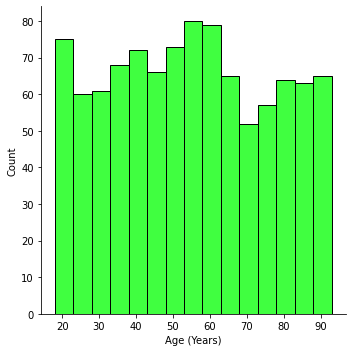

In [ ]:
#PLOTTING UNIVARIATE AGE PLOT 

age_plot = sns.displot(vis_data,x="Age (Years)", binwidth = 5 , color= "lime")



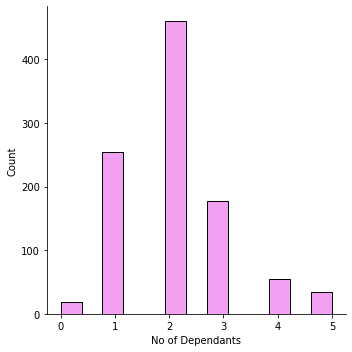

In [ ]:
# PLOTTING UNIVARIATE NO OF DEPENDANTS
dependants_plot = sns.displot(data = vis_data['Dependants'].fillna(0), 
                              color="violet")
dependants_plot.set(ylabel="Count", xlabel = "No of Dependants")


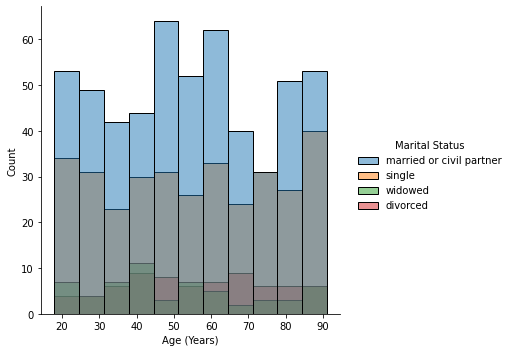

In [ ]:
# PLOTTING UNIVARIATE AE CONDITIONED ON MARITAL STATUS

age_plot_mar = sns.displot(vis_data,x="Age (Years)", hue = "Marital Status" )

TASK 3 - DATA VISUALISATION

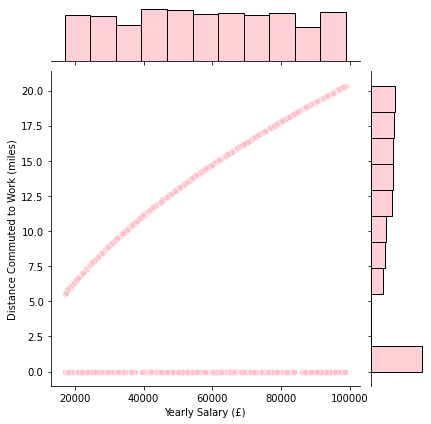

In [ ]:
# PLOTTING MULTIIVARIATE DISTANCE VS SALARY

dist_sal = sns.jointplot(y="Distance Commuted to Work (miles)",
                       x ="Yearly Salary (£)", data =vis_data, color="pink")

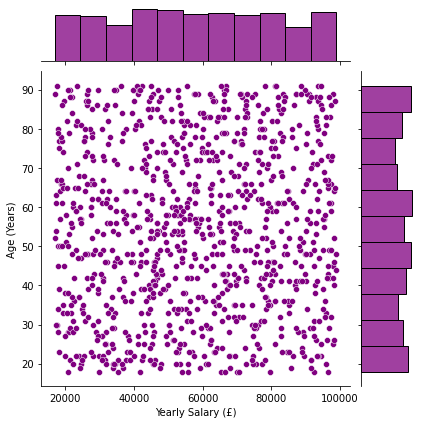

In [ ]:
# PLOTTING AGE VS SALARY

age_sal = sns.jointplot(y="Age (Years)",
                       x ="Yearly Salary (£)", data =vis_data, color="purple")

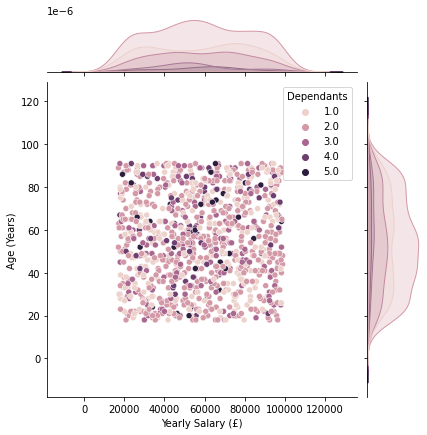

In [ ]:
# PLOTTING AGE VS SALARY CONDITIONED BY DEPENDANTS
age_sal_dep = sns.jointplot(y="Age (Years)",
                       x ="Yearly Salary (£)", data =vis_data, 
                       hue= "Dependants")

TASK 4 - DATA VISUALISATION


In [ ]:
#SAVING PLOTS TO FILES
def save_image_file(plot, filename):
  """ Return a statement telling you if a user should be flagged   
    Parameters
    ------------
        plot: seaborn object
            An image plot done with seaborn

        filename: str
          A string used to name the saved file
        
    Return
    -----------
        saves the image to file
  """
  plot.savefig(filename+".jpg")

if __name__ == '__main__':
  # print the function's docstring using the object's special __doc__ attribute
  print(save_image_file.__doc__)

#test
save_image_file(age_plot, "age_plot")
save_image_file(dependants_plot, "dependants_plot")
save_image_file(age_plot_mar, "age_plot_mar")
save_image_file(dist_sal, "dist_vs_sal")
save_image_file(age_sal_dep, "age_vs_sale_dep")
save_image_file(age_sal, "age_vs_sal")



 Return a statement telling you if a user should be flagged   
    Parameters
    ------------
        plot: seaborn object
            An image plot done with seaborn

        filename: str
          A string used to name the saved file
        
    Return
    -----------
        saves the image to file
  
